In [100]:
import pandas as pd
from pandas import datetime
import numpy as np
import matplotlib.pyplot as plt
#Below styling methods come in handy for visualization tasks
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 8,8

In [42]:
tcs = pd.read_csv('dataset/tcs_data.csv')
infy = pd.read_csv('dataset/infy_data.csv')
nifty = pd.read_csv('dataset/nifty_data.csv')
tcs.name='TCS'
infy.name='TCS'
nifty.name='TCS'
stocks = [tcs, infy, nifty]

In [43]:
def date_to_feature(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['Year'] = df['Date'].dt.year
    df['Month'] = df.Date.dt.month
    df['Day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.weekofyear

In [44]:
for i in range(len(stocks)):
    date_to_feature(stocks[i])    

In [45]:
infy.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
0,2015-01-01,1968.95,1982.00,1956.9,1974.40,500691,9.870306e+13,2015,1,1,1
1,2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580,3.394669e+14,2015,1,2,1
2,2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256,4.979911e+14,2015,1,5,2
3,2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829,4.724458e+14,2015,1,6,2
4,2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479,3.557162e+14,2015,1,7,2


In [46]:
# For simplicity, associate the dates as the indices, not integers
def indexing(stock):
    stock.index = stock['Date']
    stock.index = pd.to_datetime(stock.index, unit='s')
for stock in stocks:
    indexing(stock)

In [47]:
infy.head()

,Date,Open,High,Low,Close,Volume,Turnover,Year,Month,Day,WeekOfYear
Date,,,,,,,,,,,
2015-01-01,2015-01-01,1968.95,1982.00,1956.9,1974.40,500691,9.870306e+13,2015,1,1,1
2015-01-02,2015-01-02,1972.00,2019.05,1972.0,2013.20,1694580,3.394669e+14,2015,1,2,1
2015-01-05,2015-01-05,2009.90,2030.00,1977.5,1995.90,2484256,4.979911e+14,2015,1,5,2
2015-01-06,2015-01-06,1980.00,1985.00,1934.1,1954.20,2416829,4.724458e+14,2015,1,6,2
2015-01-07,2015-01-07,1965.00,1974.75,1950.0,1963.55,1812479,3.557162e+14,2015,1,7,2


In [126]:
#Set default values for weekly moving averages
dummy2 = pd.DataFrame()
def plot_time_series(stock, weeks = [4, 16, 28, 40, 52]):
    
    dummy = pd.DataFrame()
    # Resampling into weeks format for calculation
    dummy['Close'] = stock['Close'].resample('W').mean() 
    
    for i in range(len(weeks)):
        # Simple moving average
        m_a = dummy['Close'].rolling(weeks[i]).mean()
        df['new_col'] =
        dummy[" MA for " + str(weeks[i])+ " weeks"] = m_a
        print('week : ',weeks[i],' values : ',dummy['Close'])
        print('Calculated Moving averages: for {} weeks :' .format(weeks[i]))
        print('\nminimum : {0:.2f} | maximum : {1:.2f}\n\n' .format(min(dummy['Close']),max(dummy['Close'])))
    dummy.plot(title="Moving Averages for {} \n\n" .format(stock.name))
    return dummy

week :  4  values :  Date
2015-01-04    2562.500000
2015-01-11    2472.130000
2015-01-18    2520.160000
2015-01-25    2508.480000
2015-02-01    2517.087500
2015-02-08    2542.980000
2015-02-15    2482.970000
2015-02-22    2644.262500
2015-03-01    2677.941667
2015-03-08    2721.962500
2015-03-15    2619.490000
2015-03-22    2582.510000
2015-03-29    2562.020000
2015-04-05    2553.583333
2015-04-12    2618.400000
2015-04-19    2585.225000
2015-04-26    2450.250000
2015-05-03    2486.550000
2015-05-10    2506.990000
2015-05-17    2520.940000
2015-05-24    2552.710000
2015-05-31    2608.980000
2015-06-07    2602.010000
2015-06-14    2563.390000
2015-06-21    2522.040000
2015-06-28    2575.840000
2015-07-05    2583.720000
2015-07-12    2568.300000
2015-07-19    2531.880000
2015-07-26    2532.470000
2015-08-02    2499.450000
2015-08-09    2538.200000
2015-08-16    2637.360000
2015-08-23    2704.450000
2015-08-30    2573.610000
2015-09-06    2569.260000
2015-09-13    2545.440000
2015-09-20  

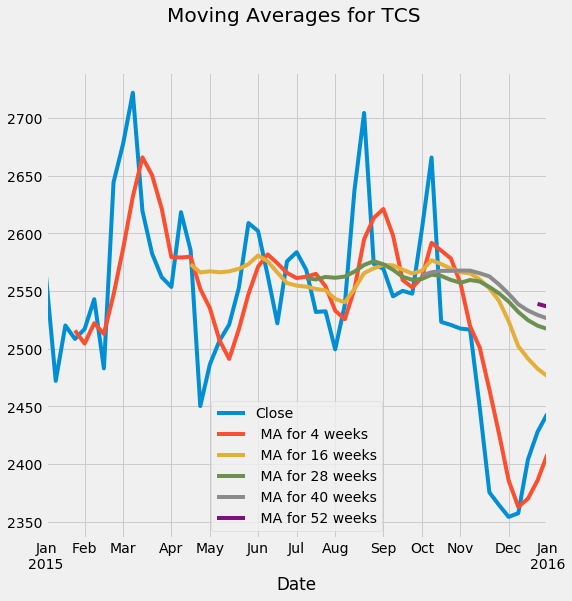

In [127]:
tcs_dummy = plot_time_series(tcs)

In [117]:
# The plot is not so well layed out for larger movsuspiciousing average size : 
tcs_dummy.head()

,Close,MA for 4 weeks,MA for 16 weeks,MA for 28 weeks,MA for 40 weeks,MA for 52 weeks
Date,,,,,,
2015-01-04,2562.5000,NaN,NaN,NaN,NaN,NaN
2015-01-11,2472.1300,NaN,NaN,NaN,NaN,NaN
2015-01-18,2520.1600,NaN,NaN,NaN,NaN,NaN
2015-01-25,2508.4800,2515.817500,NaN,NaN,NaN,NaN
2015-02-01,2517.0875,2504.464375,NaN,NaN,NaN,NaN


In [132]:
a = np.arange(5)
df = pd.DataFrame(a, columns=['a'])
print('before :\n',df)
df.rolling(3).mean().dropna()
print('after :\n',df.rolling(3).mean().dropna())

before :
    a
0  0
1  1
2  2
3  3
4  4
after :
      a
2  1.0
3  2.0
4  3.0


In [129]:
df

,a
0,0
1,1
2,2
3,3
4,4
